In [1]:
# Shoutout to https://ccmc.gsfc.nasa.gov/modelweb/models/msis_vitmo.php

In [1]:
# --------
# Packages
# --------

# Mathematics
import numpy as np
import scipy.io as sio

# Plots
import matplotlib.pyplot as plt


In [2]:
# ----
# Data
# ----

# Load .mat-file as a Python dictionary
mat_contents = sio.loadmat('msisdata_mod.mat')
print(f'mat_contents.keys(): {mat_contents.keys()}')

# Create individual ndarrays by fetching dictionary values
temperature = mat_contents['TMsis']  # 151 x 13 x 19
density = mat_contents['NMsis']  # 151 x 13 x 19
latitudes = mat_contents['latMsis']  # 1 x 19
months = mat_contents['monthMsis']  # 1 x 13
altitudes = mat_contents['zMsis']  # 151 x 1


mat_contents.keys(): dict_keys(['__header__', '__version__', '__globals__', 'NMsis', 'TMsis', 'latMsis', 'monthMsis', 'zMsis'])


In [3]:
# -------
# Utility
# -------

def lat_to_index(lat):
    return np.where(latitudes == lat)[1][0]


print(lat_to_index(50))


14


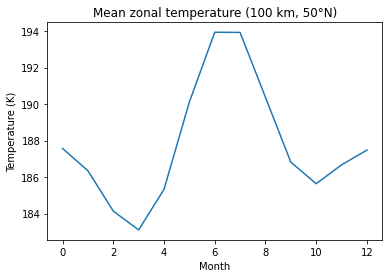

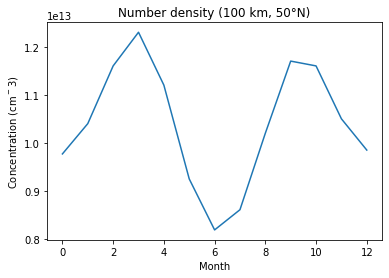

In [4]:
# ~~~~~~~~~~~
# Exploration
# ~~~~~~~~~~~

snapshot = temperature[100, :, lat_to_index(50)]
plt.plot(snapshot)
plt.xlabel('Month')
plt.ylabel('Temperature (K)')
plt.title('Mean zonal temperature (100 km, 50°N)')
plt.show()

snapshot2 = density[100, :, lat_to_index(50)]
plt.plot(snapshot2)
plt.xlabel('Month')
plt.ylabel('Concentration (cm$^-3$)')
plt.title('Number density (100 km, 50°N)')
plt.show()


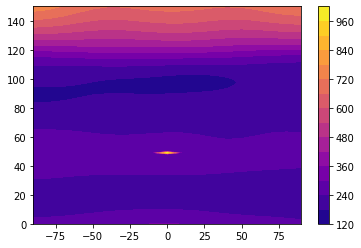

In [5]:
# ----------------
# (1) Contour plot
# ----------------

# Parameters
levels = 15
cmap = 'plasma'


def plot_contour(temperature, month):
    output = temperature[:, month, :]
    x1, y1 = np.meshgrid(latitudes, altitudes)
    sc = plt.contourf(x1, y1, output, levels=levels, cmap=cmap)
    plt.colorbar(sc)
    plt.show()


# Plot the results for March
plot_contour(temperature, 2)

# Remove sneaky scientific fraud ;)
temperature[49, 2, lat_to_index(0)] = 269.9


In [7]:
# ------------
# (2) Pressure
# ------------

# Parameters
avogadro = 6.022e+23  # 1 / mol
gas_constant = 8.314e6  # (cm^3 * Pa) / (K * mol)


def get_pressure(density, temperature):
    pressure = density * gas_constant * temperature / avogadro
    return pressure


# Sanity check by checking sea level
d = density[0, 0, lat_to_index(50)]
t = temperature[0, 0, lat_to_index(50)]
p = get_pressure(d, t)
print(p)

# ----------------
# (3) Add pressure
# ----------------

vectorized = np.vectorize(get_pressure)
pressure = vectorized(density, temperature)
print(pressure.shape)


101282.82681501162
(151, 13, 19)


In [8]:
# ------------
# (4) Extremes
# ------------

# Average over altitude, latitude or time?
# Sea level, atmosphere?
# Maximum, highest average (if average)?

hottest = np.unravel_index(
    np.argmax(temperature, axis=None), temperature.shape)
print(hottest)  # Thermosphere/January/Equator

coldest = np.unravel_index(
    np.argmin(temperature, axis=None), temperature.shape)
print(coldest)  # Mesosphere/July/Northpole

# --------
# (5) Why?
# --------

# "Thermospheric temperatures increase with altitude due to absorption of highly energetic solar radiation." - Wikipedia

# "Within the mesosphere, temperature decreases with increasing height, due to decreasing absorption of solar radiation by the rarefied atmosphere and increasing cooling by CO2 radiative emission. The top of the mesosphere, called the mesopause, is the coldest part of Earth's atmosphere." - Wikipedia


(150, 0, 0)
(88, 6, 18)
